# Ejercicio 2
Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$ respecto a $h$.

In [1]:
f(x)=cos(x) 

f (generic function with 1 method)

In [2]:
function derivada_Numerica(f,x,h)
    df=(f(x+h)-f(x))/h #Corresponde a la expreión para calcular la derivada numerica
return df
end

derivada_Numerica (generic function with 1 method)

In [3]:
h=linspace(0.001,0.01,15) #Se tomó un intervalo para h con valores muy pequeños

0.001:0.0006428571428571428:0.01

In [32]:
collect(h) #Se pueden observar los valores del intervalo donde se definió h

15-element Array{Float64,1}:
 0.001     
 0.00164286
 0.00228571
 0.00292857
 0.00357143
 0.00421429
 0.00485714
 0.0055    
 0.00614286
 0.00678571
 0.00742857
 0.00807143
 0.00871429
 0.00935714
 0.01      

In [4]:
listDS=derivada_Numerica.(f,0.9,h) #Se evalúo la derivada_Numerica en el punto x0=0.9 y se generó un resultado para cada valor de h que iba tomando la función.

15-element Array{Float64,1}:
 -0.783638
 -0.783837
 -0.784037
 -0.784236
 -0.784435
 -0.784634
 -0.784833
 -0.785032
 -0.785231
 -0.78543 
 -0.785629
 -0.785827
 -0.786025
 -0.786224
 -0.786422

In [5]:
#En esta parte se calcula la derivada exacta de la función f(x)=cos(x), para comparar más adelante con las aproximaciones de la derivada numérica.
function derivada_exacta(x)
    return dg=-sin(x)
end

derivada_exacta (generic function with 1 method)

In [6]:
derivada_exacta(0.9)

-0.7833269096274834

In [7]:
G(x)=1/x #Se creó esta función para tener 1/h y así poder evaluar en esta función cada valor de h.

G (generic function with 1 method)

In [8]:
listG=G.(h) #Despliega una lista de los valores 1/h

15-element Array{Float64,1}:
 1000.0  
  608.696
  437.5  
  341.463
  280.0  
  237.288
  205.882
  181.818
  162.791
  147.368
  134.615
  123.894
  114.754
  106.87 
  100.0  

In [9]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [10]:
using PyPlot

In [11]:
Y=ones(length(listG)).*-sin(0.9) #Esta varibale funciona para representar en la gráfica como las aproximaciones de la derivada numerica van convergiendo al valor de la derivada exacta.

15-element Array{Float64,1}:
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327

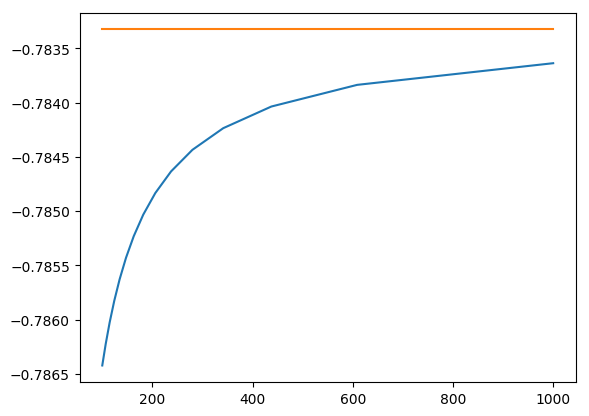

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8374e5ee90>

In [12]:
plot(listG,listDS) #Gráfica en color azul representa el comportamiento del resultado de la derivada numérica contra $1/h$
plot(listG,Y) #Gráfica en color naranja representa como las aproximaciones de la derivada numérica van convergiendo al valor de la derivada exacta que en este caso fue de -0.7833269096274834.

In [13]:
#Para conocer el error relativo de las proximaciones al valor de la derivada exacta se utilizó la siguiente expresión
function error_relativo(f,x,h)
    e=abs((((f(x+h)-f(x))/h)-derivada_exacta(x))/derivada_exacta(x))
return e
end

error_relativo (generic function with 1 method)

In [14]:
E=error_relativo.(f,0.9,h) #Se evalúa el valor de x=0.9 en la función E para cada valor de h

15-element Array{Float64,1}:
 0.000396609
 0.000651396
 0.000906044
 0.00116056 
 0.00141493 
 0.00166916 
 0.00192326 
 0.00217722 
 0.00243104 
 0.00268472 
 0.00293826 
 0.00319167 
 0.00344494 
 0.00369807 
 0.00395106 

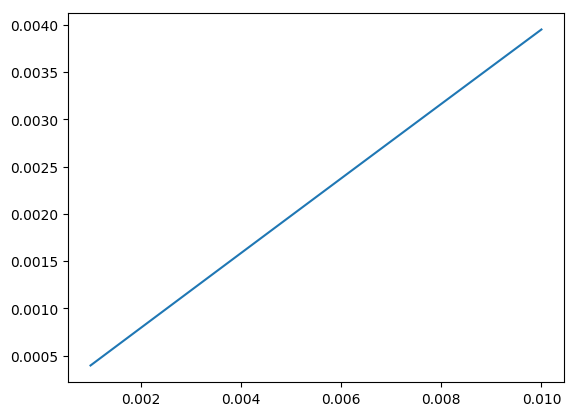

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f834cdc0e90>

In [15]:
plot(h,E) #Esta gráfica corresponde variación lineal que hay entre el error relativo y el valor de la h.

# Ejercicio 3
Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

Por un lado sabemos que la derivada numérica tiene un error del orden de $h$.

$$\frac{\Delta f(x,h)}{h}-f'(x)=\mathcal{O}(h)$$  (1)

mientras que para la derivada simetrica se tiene un error del orden dado por:

$$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^2)$$  (2)

Se podrían combinar ambas ecuaciones para ver la relación que hay con los tipos de derivadas y con ello poder despejar $f'(x)$

De la ecuación 2 despejamos $f(x+h)$

$$f(x+h)=2h[\mathcal{O}(h^2)+f'(x)]+f(x-h)$$

Luego sustituimos $f(x+h)$ en la ecuación 1

$$\frac{2h[\mathcal{O}(h^2)+f'(x)]+f(x-h)-f(x)}{h}-f'(x)=\mathcal{O}(h)$$ (3)

de la ecuación (3) despejamos $f'(x)$, entonces

$$2h[\mathcal{O}(h^2)+f'(x)]+f(x-h)-f(x)-hf'(x)=h\mathcal{O}(h)$$

$$2hf'(x)-hf'(x)=h\mathcal{O}(h)-2h\mathcal{O}(h^2)-f(x-h)+f(x)$$

$$f'(x)=\frac{h\mathcal{O}(h)-2h\mathcal{O}(h^2)-f(x-h)+f(x)}{h}$$




Pregunta: ¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

Se podría interpolar con Lagrange para obtener un polinomio de grado 1, el cual corresponderia a una recta que pase por el punto donde esta definida la deriva, y así poder obtener la pendiente de la recta dada por la interpolación; ya que la definicón de derivada precisamente corresponde con la pendiente de la recta tangente a la gráfica de la función en dicho punto. 

# Ejercicio 4
Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [16]:
f(x)=cos(x)

f (generic function with 1 method)

In [17]:
function derivada_Simetrica(f,x,h)
    df=(f(x+h)-f(x-h))/2h 
return df
end

derivada_Simetrica (generic function with 1 method)

In [18]:
h=linspace(0.001,0.01,15) #Se tomó un intervalo para h con valores muy pequeños

0.001:0.0006428571428571428:0.01

In [19]:
collect(h) #Se pueden observar los valores del intervalo donde se definió h

15-element Array{Float64,1}:
 0.001     
 0.00164286
 0.00228571
 0.00292857
 0.00357143
 0.00421429
 0.00485714
 0.0055    
 0.00614286
 0.00678571
 0.00742857
 0.00807143
 0.00871429
 0.00935714
 0.01      

In [20]:
listDS=derivada_Simetrica.(f,0.9,h) #Se evalúo la derivada_Simetria en el punto x0=0.9 y se generó un resultado para cada valor de h que iba tomando la función.

15-element Array{Float64,1}:
 -0.783327
 -0.783327
 -0.783326
 -0.783326
 -0.783325
 -0.783325
 -0.783324
 -0.783323
 -0.783322
 -0.783321
 -0.78332 
 -0.783318
 -0.783317
 -0.783315
 -0.783314

In [21]:
#En esta parte se calcula la derivada exacta de la función f(x)=cos(x), para comparar más adelante con las aproximaciones de la derivada simétrica.
function derivada_exacta(x)
    return dg=-sin(x)
end

derivada_exacta (generic function with 1 method)

In [22]:
derivada_exacta(0.9)

-0.7833269096274834

In [23]:
G(x)=1/x #Se creó esta función para tener 1/h y así poder evaluar en esta función cada valor de h.

G (generic function with 1 method)

In [24]:
listG=G.(h) #Despliega una lista de los valores 1/h

15-element Array{Float64,1}:
 1000.0  
  608.696
  437.5  
  341.463
  280.0  
  237.288
  205.882
  181.818
  162.791
  147.368
  134.615
  123.894
  114.754
  106.87 
  100.0  

In [25]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [26]:
using PyPlot

In [27]:
Y=ones(length(listG)).*-sin(0.9) #Esta varibale funciona para representar en la gráfica como las aproximaciones de la derivada simetrica van convergiendo al valor de la derivada exacta.

15-element Array{Float64,1}:
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327
 -0.783327

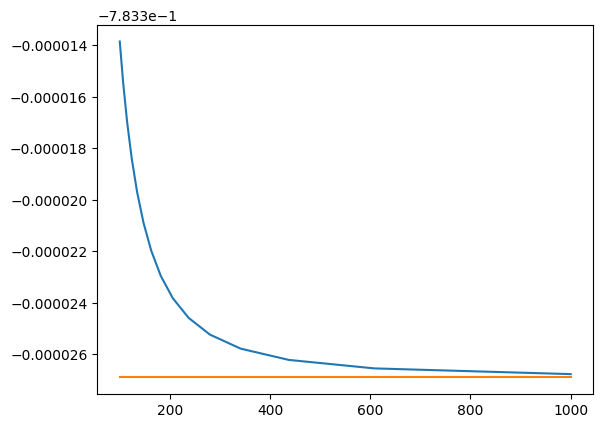

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f834cd06d90>

In [28]:
plot(listG,listDS) #Gráfica en color azul representa el comportamiento del resultado de la derivada simétrica contra $1/h$
plot(listG,Y) #Gráfica en color naranja representa como las aproximaciones de la derivada simética van convergiendo al valor de la derivada exacta que en este caso fue de -0.7833269096274834.

In [29]:
#Para conocer el error relativo de las proximaciones al valor de la derivada exacta se utilizó la siguiente expresión
function error_relativo(f,x,h)
    e=abs((((f(x+h)-f(x-h))/2h)-derivada_exacta(x))/derivada_exacta(x))
return e
end

error_relativo (generic function with 1 method)

In [30]:
E=error_relativo.(f,0.9,h) #Se evalúa el valor de x=0.9 en la función E para cada valor de h

15-element Array{Float64,1}:
 1.66667e-7
 4.4983e-7 
 8.70748e-7
 1.42942e-6
 2.12585e-6
 2.96003e-6
 3.93197e-6
 5.04166e-6
 6.2891e-6 
 7.6743e-6 
 9.19725e-6
 1.0858e-5 
 1.26564e-5
 1.45926e-5
 1.66666e-5

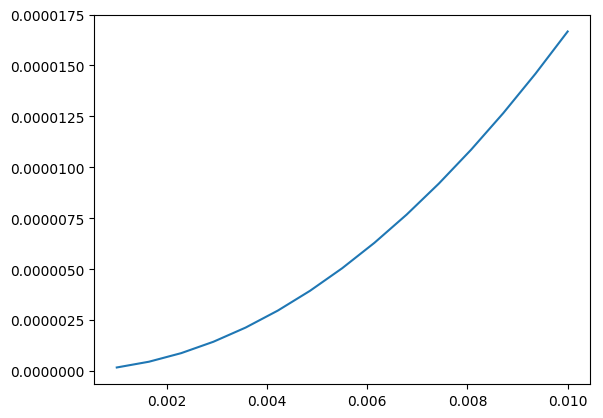

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f834cc45f90>

In [31]:
plot(h,E) #Esta gráfica corresponde variación no lineal que hay entre el error relativo y el valor de la h. Se observa que conforme aumenta h el error crece también pero ya no de forma lineal como en le caso de la Derivada Numérica.

# Ejercicio 5
Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Para ver que $\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h)$ es un operador lineal tiene que cumplir con lo siguiente:

$$\Delta_h(a_1\phi_1(x)+a_2\phi_2(x))=\Delta{a_1\phi_1(x,h)}+\Delta{a_2\phi_2(x,h)}$$

$$\Delta_h(a_1\phi_1(x)+a_2\phi_2(x))=\Delta_h{a_1\phi_1(x)}+\Delta_h{a_2\phi_2(x)}$$

Dado que $\Delta{f(x)}=\Delta{f(x,h)}$ y se considera la relación entra ambas, entonces se tiene:

$$=\Delta_h{a_1\phi_1(x+h)}+\Delta_h{a_2\phi_2(x+h)}-a_1\phi_1(x)-a_2\phi_2(x)$$

$$=\Delta_h{a_1\phi_1(x,h)}+\Delta_h{a_2\phi_2(x,h)}$$

Por lo tanto $\Delta_h$ es un operador lineal, de tal forma que

$$\Delta_h{f(x)}=\Delta_h=[\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}]f(x)$$

De la ecuación anterior factorizamos la función $f(x)$ del operador $\Delta_h$, entonces

$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$


# Ejericico 6
Para saber como se relaciona el operador derivada exacta con el operador diferencia finita hacia adelante es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma: $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$

Solución.

Sea $x=h\left. \frac{d}{d\xi}\right|_{\xi=x}$

El operador diferencia finita hacia adelante $\Delta_h$, el cual se define como:

$$\Delta_h=f(x+h)-f(x)$$

Se hace un desarrollo en serie de Taylor para obtener $f(x+h)$, entonces nos queda la siguiente expresión:

$$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)$$

La expresión $f(x+h)$ la sustituimos en la ecuaucón $\Delta_h$, por lo tanto

$$\Delta_h=h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)$$

Del desarrollo en serie de potencias de la expresion para $\Delta_h$ se observa que la serie lleva un comporatamiento parecido al de la función exponencial desarrollada en serie de Taylor, con la difrencia de un menos uno.

$$e^{x}=1+x+\frac{x^2}{2}+\frac{x^3}{6}+\frac{x^4}{24}+\mathcal{O}\left(h^{5}\right)$$

donde $x=h\left. \frac{d}{d\xi}\right|_{\xi=x}$, sustituyendo sumando un -1 a la serie de la expoencial llegamos a

$$\Delta_h=e^{x}-1$$